In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 5.1 Transition matrix

In [3]:
P = np.array([[0, 1, 0, 0],
    [1/2, 0, 1/2, 0],
    [0, 1/2, 0, 1/2],
    [0, 0, 1, 0]])

In [3]:
w1 = np.array([1/6, 2/6, 2/6, 1/6]).T
w2 = np.array([1/2, 1/2, 0, 0]).T
w3 = np.array([1/2, 1/4, 0, 1/4]).T

### c) Check whether any of them represents a stationary distribution:

In [4]:
state_1 = w1@P
state_2 = w2@P
state_3 = w3@P
print(state_1)
print(state_2)
print(state_3)

[0.16666667 0.33333333 0.33333333 0.16666667]
[0.25 0.5  0.25 0.  ]
[0.125 0.5   0.375 0.   ]


* w1 represents a stationary ditribution, because the vector remains unchanged after applying the the transition matrix

### d) Apply the transition matrix to the distributions 𝑛 times.

In [5]:
def apply_matrix(w, P):
    result = [w, ]
    for n in range(1,8):
        result.append(result[-1] @ P)
    return np.array(result)

In [6]:
res_1 = apply_matrix(w1,P)
res_2 = apply_matrix(w2,P)
res_3 = apply_matrix(w3,P)

In [7]:
print('w_1: ',res_1)
print('w_2: ',res_2)
print('w_3: ',res_3)

w_1:  [[0.16666667 0.33333333 0.33333333 0.16666667]
 [0.16666667 0.33333333 0.33333333 0.16666667]
 [0.16666667 0.33333333 0.33333333 0.16666667]
 [0.16666667 0.33333333 0.33333333 0.16666667]
 [0.16666667 0.33333333 0.33333333 0.16666667]
 [0.16666667 0.33333333 0.33333333 0.16666667]
 [0.16666667 0.33333333 0.33333333 0.16666667]
 [0.16666667 0.33333333 0.33333333 0.16666667]]
w_2:  [[0.5        0.5        0.         0.        ]
 [0.25       0.5        0.25       0.        ]
 [0.25       0.375      0.25       0.125     ]
 [0.1875     0.375      0.3125     0.125     ]
 [0.1875     0.34375    0.3125     0.15625   ]
 [0.171875   0.34375    0.328125   0.15625   ]
 [0.171875   0.3359375  0.328125   0.1640625 ]
 [0.16796875 0.3359375  0.33203125 0.1640625 ]]
w_3:  [[0.5        0.25       0.         0.25      ]
 [0.125      0.5        0.375      0.        ]
 [0.25       0.3125     0.25       0.1875    ]
 [0.15625    0.375      0.34375    0.125     ]
 [0.1875     0.328125   0.3125     0.171

* after applying the transition matrix on every initial vector, the final state apporches the stationary distibution

In [8]:
import scipy.linalg
w_l, v_l = scipy.linalg.eig(P, left=True, right=False)
w_r, v_r = scipy.linalg.eig(P, left=False, right=True)

In [9]:
st = np.array([0.16666667, 0.33333333, 0.33333333, 0.16666667])
print(np.around(w_l, 2))
print(np.around(v_l, 3))

[-1. +0.j -0.5+0.j  1. +0.j  0.5+0.j]
[[-0.316 -0.5    0.316 -0.5  ]
 [ 0.632  0.5    0.632 -0.5  ]
 [-0.632  0.5    0.632  0.5  ]
 [ 0.316 -0.5    0.316  0.5  ]]


In [10]:
print(np.around(w_r, 2))
print(np.around(v_r, 3))

[-1. +0.j -0.5+0.j  1. +0.j  0.5+0.j]
[[-0.5   -0.632  0.5   -0.632]
 [ 0.5    0.316  0.5   -0.316]
 [-0.5    0.316  0.5    0.316]
 [ 0.5   -0.632  0.5    0.632]]


## 5.2 Markov model from a trajectory

In [11]:
traj = np.loadtxt('dtraj.txt')

Text(0,0.5,'state')

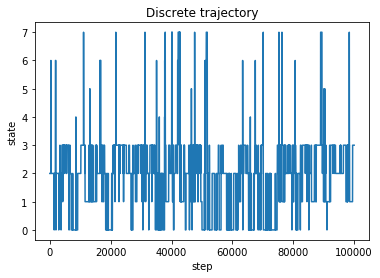

In [12]:
plt.plot(traj)
plt.title('Discrete trajectory')
plt.xlabel('step')
plt.ylabel('state')

### a) Plot discrete trajectory:

In [13]:
def transition_matrix(x):
    n = len(np.unique(x))
    P = np.zeros((n, n))
    for i in range(len(x)-1):
        P[x[i], x[i+1]] = P[x[i], x[i+1]] + 1
    for i in range(8):
        P[i, :] = P[i, :]/np.sum(P[i, :])
    return P

In [14]:
P_t = transition_matrix(np.array(traj).astype(int))
print(np.around(P_t, 3))

[[0.995 0.    0.004 0.    0.    0.    0.    0.   ]
 [0.    0.995 0.    0.005 0.    0.    0.    0.   ]
 [0.003 0.    0.993 0.003 0.    0.    0.001 0.   ]
 [0.    0.002 0.004 0.993 0.    0.    0.    0.001]
 [0.022 0.    0.007 0.    0.97  0.    0.    0.   ]
 [0.    0.056 0.    0.    0.    0.916 0.    0.028]
 [0.    0.    0.014 0.    0.    0.001 0.98  0.005]
 [0.    0.    0.    0.012 0.    0.002 0.002 0.985]]


$$P=\begin{bmatrix}
    0.995 & 0    & 0.004 & 0    & 0    & 0    & 0    & 0    \\
    0    & 0.995 & 0    & 0.005 & 0    & 0    & 0    & 0 \\
    0.003 & 0    & 0.993 & 0.003 & 0    & 0    & 0.001 & 0 \\
    0    & 0.002 & 0.004 & 0.993 & 0    & 0    & 0    & 0.001 \\
    0.022 & 0    & 0.007 & 0    & 0.97  & 0    & 0    & 0   \\
    0    & 0.056 & 0    & 0    & 0    & 0.916 & 0    & 0.028 \\
    0    & 0    & 0.014 & 0    & 0    & 0.001 & 0.98  & 0.005 \\
    0    & 0    & 0    & 0.012 & 0    & 0.002 & 0.002 & 0.985 \\
\end{bmatrix}$$

In [15]:
print(np.sum(P_t, axis=1))

[1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
w, vl = scipy.linalg.eig(P_t, left=True, right=False)
eig_val = np.sort(w)[::-1]
eig_vec = np.array([vl[np.where(eig_val[i] == w)] for i in range(len(eig_val))])

In [21]:
def plot_eigenvectors(v, n):
    fig, ax = plt.subplots(n, figsize=(10,18))
    for i in range(n):
        v[i] = v[i]/np.sum(v[i])
        print('Eignevector ',i+1, ' :',  np.around(v[i], 3))
        ax[i].plot(v[i][0])
        ax[i].set_xlabel('State')
        ax[i].set_title('Eigenvector {}'.format(i+1))

Eignevector  1  : [[-0.062 -0.016  0.369 -0.476  0.341 -0.349  0.51   0.683]]
Eignevector  2  : [[-0.000e+00  1.004e+00 -3.000e-03  4.000e-03  7.000e-03 -6.000e-03
  -4.000e-03 -1.000e-03]]
Eignevector  3  : [[ 0.978  0.     0.005  0.003 -0.003 -0.001  0.     0.017]]
Eignevector  4  : [[-0.033 -0.027  1.876 -0.069 -0.031 -0.095 -0.103 -0.519]]


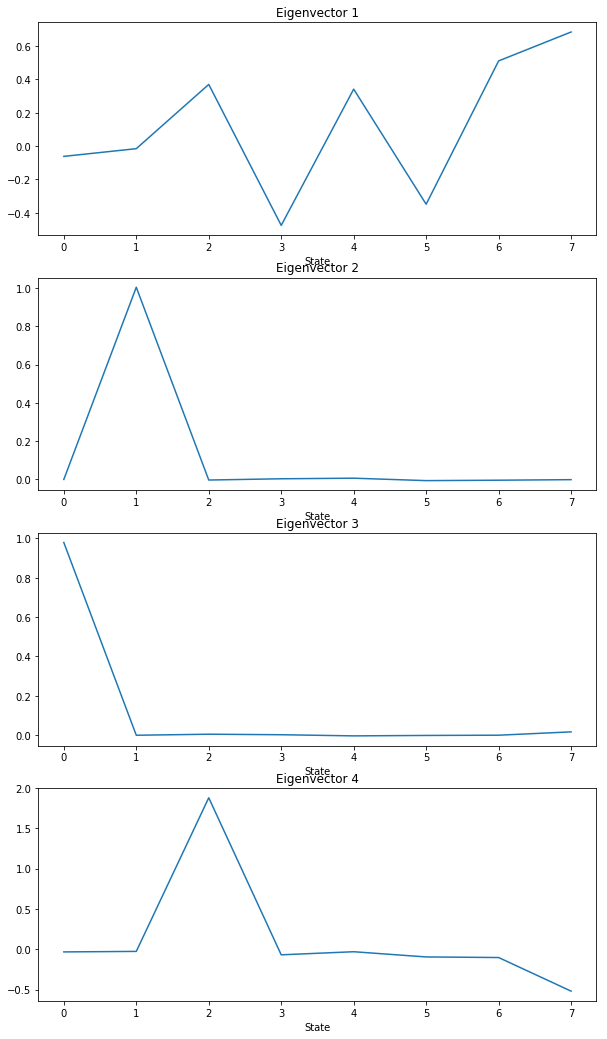

In [22]:
plot_eigenvectors(eig_vec, 4)